# TITANIC SURVIVAL PREDICTION
#### Use the Titanic dataset to build a model that predicts whether a
#### passenger on the Titanic survived or not. This is a classic beginner project with readily available data.
#### The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

### Importing Packages
#### Importing all the necessary packages to perform the necessary task.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Reading the data
#### Reading the dataset in the form of csv file format and creating dataframe from it and analyzing the basic information like NaN values, duplicates and others.

In [2]:
data = pd.read_csv("titanic.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [3]:
data1=data['Age'].fillna(method="ffill")
data = data.drop(['Age'],axis='columns')
df = pd.concat([data,data1],axis='columns')
data2=data['Fare'].fillna(method="ffill")
df = pd.concat([df,data2],axis='columns')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Age          418 non-null    float64
 12  Fare         418 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 42.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age,Fare
0,892,0,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,34.5,7.8292
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,47.0,7.0000
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,62.0,9.6875
3,895,0,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,27.0,8.6625
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,22.0,12.2875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,NaN,S,28.0,8.0500
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C105,C,39.0,108.9000
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,38.5,7.2500
416,1308,0,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,NaN,S,38.5,8.0500


### Data Preprocessing
#### Data Handeling (handeling duplicate records, null values, cleaning of data etc.)

In [4]:
#for duplicate records 
print(df.duplicated().sum())
#sum function is used to consider all cols

0


In [5]:
#splitting into dummy test and train dataset
ratio = 0.75
trows = df.shape[0]
#print("Total rows : ",trows)
tr_size = int(trows*ratio)
#print("Train Dataset Size :",tr_size)
train = df[0:tr_size]
test = df[tr_size:]

In [6]:
# dummy train dataset
train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age,Fare
0,892,0,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,34.5,7.8292
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,47.0,7.0000
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,62.0,9.6875
3,895,0,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,27.0,8.6625
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,22.0,12.2875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,1200,0,1,"Hays, Mr. Charles Melville",male,1,1,12749,93.5000,B69,S,55.0,93.5000
309,1201,1,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,1,0,350026,14.1083,NaN,S,45.0,14.1083
310,1202,0,3,"Cacic, Mr. Jego Grga",male,0,0,315091,8.6625,NaN,S,18.0,8.6625
311,1203,0,3,"Vartanian, Mr. David",male,0,0,2658,7.2250,NaN,C,22.0,7.2250


### Analysis of Dummy Training Dataset
This dataset is created to visualize the data in categories for better understanding. This is for the understanding purpose only.
Considered Attributes are : Sex, Age and Survived

In [7]:
#filtering training data on basis of gender, age and survival
women = train[train['Sex']=='female']
wage = women.dropna(subset=['Age'])
wsur = wage[wage['Survived']==1]
wnotsur = wage[wage['Survived']==0]

men = train[train['Sex']=='male']
mage = men.dropna(subset=['Age'])
msur = mage[mage['Survived']==1]
mnotsur = mage[mage['Survived']==0]

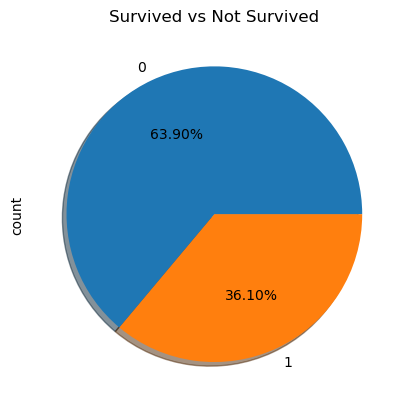

In [8]:
#Survived and Not Survived Count Plot
train['Survived'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)
plt.title("Survived vs Not Survived")
plt.show()

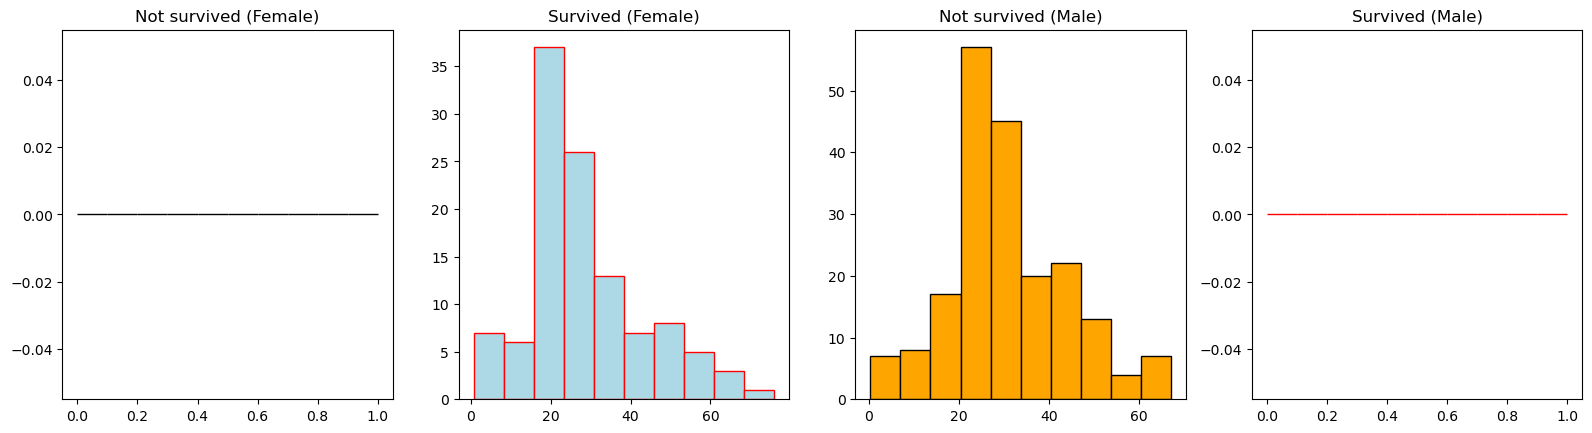

In [9]:
#Age and Genderwise Survival & not survival plot
plt.subplot(1,4,1)
plt.hist(wnotsur['Age'],color="orange",ec="black")
plt.title("Not survived (Female)")
plt.subplot(1,4,2)
plt.hist(wsur['Age'],color="lightblue",ec="red")
plt.title("Survived (Female)")

plt.subplot(1,4,3)
plt.hist(mnotsur['Age'],color="orange",ec="black")
plt.title("Not survived (Male)")
plt.subplot(1,4,4)
plt.hist(msur['Age'],color="lightblue",ec="red")
plt.title("Survived (Male)")
plt.subplots_adjust(right=2.5)
plt.show()

## Training the model after preparing actual training & testing sets
#### Here we will do actual analysis and model training of actual features and prection attributes.

In [10]:
#Selecting data for machine learning
finalcols = ['Pclass','Sex','Age','SibSp','Parch','Survived']
#converting Sex to numerical values
df['Sex'].replace({'female':0, 'male':1}, inplace=True)
#handelling nan values in finalcols
datan = df[finalcols]
scalar = StandardScaler()
scaled_data = scalar.fit_transform(datan)
datan

,Pclass,Sex,Age,SibSp,Parch,Survived
0,3,1,34.5,0,0,0
1,3,0,47.0,1,0,1
2,2,1,62.0,0,0,0
3,3,1,27.0,0,0,0
4,3,0,22.0,1,1,1
...,...,...,...,...,...,...
413,3,1,28.0,0,0,0
414,1,0,39.0,0,0,1
415,3,1,38.5,0,0,0
416,3,1,38.5,0,0,0


In [11]:
target = 'Survived'
factors = ['Pclass','Sex','Age','SibSp','Parch']

x = datan[factors].values
y = datan[target].values
#print(x)
#print(y.shape)

## Applying logistic regression
Logistic regression is one of the best ways to perform binary classifications like survived and not survived passengers.

In [12]:
# can choose parameter Penalty='l1' or C=1
# can choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
model = LogisticRegression()
#initializing test and train variables
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=42)
#data check
#print(xtrain.shape)
#print(ytrain)
#print(xtest.shape)
#print(ytest.shape)

# Printing all the parameters of logistic regression
#print(model)

# Creating the model on Training Data
ft = model.fit(xtrain, ytrain)
y_pred_train = model.predict(xtrain) #Make predictions on the training set
y_pred = model.predict(xtest) #Make predictions on the testing set

#print(y_pred)
#print(ytest)


### Analyzing the test data on the basis of Age, Gender and Survival on the test dataset

In [13]:
#filtering training data on basis of gender, age and survival
women = datan[datan['Sex']==0]
wage = women.dropna(subset=['Age'])
wsur = wage[wage['Survived']==1]
wnotsur = wage[wage['Survived']==0]

men = datan[datan['Sex']==1]
mage = men.dropna(subset=['Age'])
msur = mage[mage['Survived']==1]
mnotsur = mage[mage['Survived']==0]

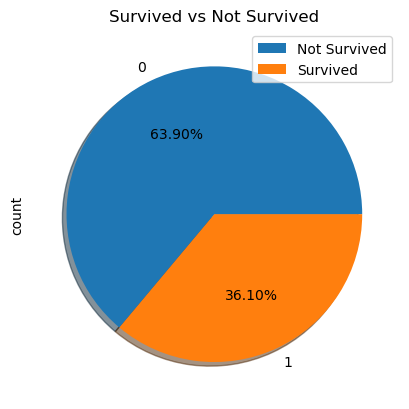

In [14]:
#Survived and Not Survived Count Plot
train['Survived'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)
plt.title("Survived vs Not Survived")
plt.legend(['Not Survived','Survived'])
plt.show()

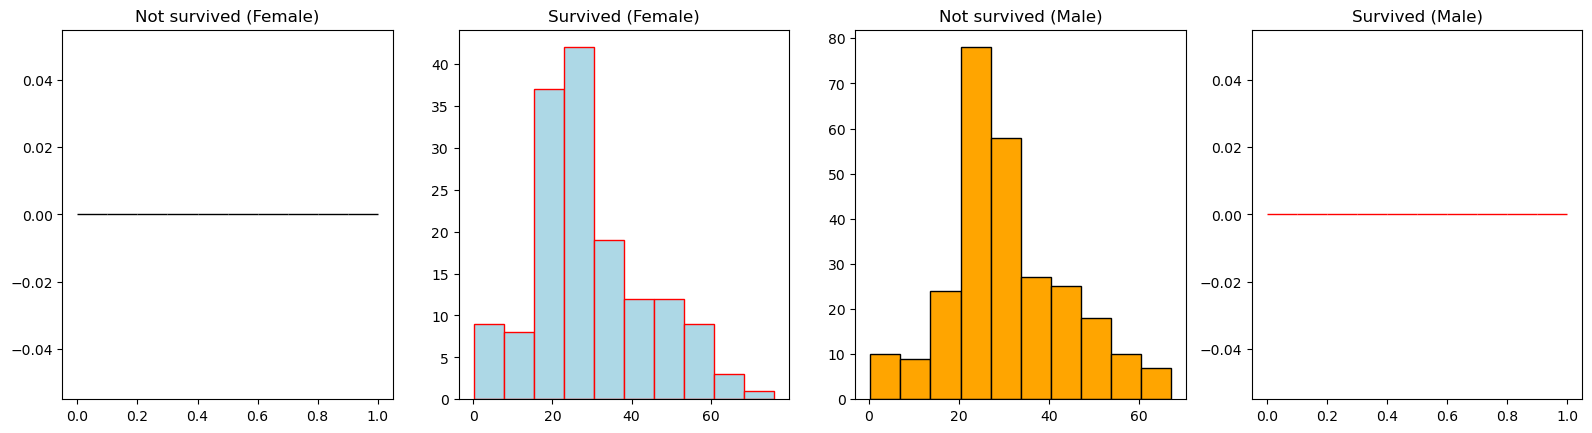

In [15]:
#Age and Genderwise Survival & not survival plot
plt.subplot(1,4,1)
plt.hist(wnotsur['Age'],color="orange",ec="black")
plt.title("Not survived (Female)")
plt.subplot(1,4,2)
plt.hist(wsur['Age'],color="lightblue",ec="red")
plt.title("Survived (Female)")

plt.subplot(1,4,3)
plt.hist(mnotsur['Age'],color="orange",ec="black")
plt.title("Not survived (Male)")
plt.subplot(1,4,4)
plt.hist(msur['Age'],color="lightblue",ec="red")
plt.title("Survived (Male)")
plt.subplots_adjust(right=2.5)
plt.show()

### Measuring the accracy of mdoel, by accuracy score and confusion matrix

In [16]:
# Measuring accuracy on Testing Data

print(metrics.classification_report(ytest, y_pred))
confusion_mat = confusion_matrix(ytest, y_pred)
acc_score = accuracy_score(ytest,y_pred)

print("Accuracy Score : ",acc_score)
print("Cofusion Matrix")
print(confusion_mat)
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(ytest, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        36

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

Accuracy Score :  1.0
Cofusion Matrix
[[69  0]
 [ 0 36]]
Accuracy of the model on Testing Sample Data: 1.0
